# Data Wrangling project using Twitter API

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import zipfile
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Gather data

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
file_name ='image_predictions.tsv'
with open(file_name, 'wb') as file:
    file.write(response.content)
df_image = pd.read_csv(file_name, sep='\t')

In [5]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth)

In [8]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [9]:
# List of the error tweets
error_list = []
# List of tweets
df_list = []
# Calculate the time of execution
start = time.time()

for tweet_id in df_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

892420643555336193 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
892177421306343426 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
891815181378084864 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
891689557279858688 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
891327558926688256 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
891087950875897856 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
890971913173991426 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
890729181411237888 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
890609185150312448 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
890240255349198849 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
890006608113172480 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
889880896479866881 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
889665388333682689 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
889638837579

871515927908634625 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
871166179821445120 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
871102520638267392 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
871032628920680449 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870804317367881728 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870726314365509632 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870656317836468226 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870374049280663552 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870308999962521604 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
870063196459192321 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
869988702071779329 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
869772420881756160 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
869702957897576449 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
869596645499

850753642995093505 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
850380195714523136 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
850333567704068097 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
850145622816686080 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
850019790995546112 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
849776966551130114 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
849668094696017920 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
849412302885593088 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
849336543269576704 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
849051919805034497 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
848690551926992896 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
848324959059550208 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
848213670039564288 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
848212111729

834086379323871233 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833863086058651648 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833826103416520705 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833732339549220864 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833722901757046785 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833479644947025920 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
833124694597443584 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832998151111966721 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832769181346996225 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832757312314028032 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832682457690300417 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832645525019123713 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832636094638288896 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
832397543355

820749716845686786 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820690176645140481 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820494788566847489 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820446719150292993 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820314633777061888 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820078625395449857 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
820013781606658049 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819952236453363712 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819924195358416896 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819711362133872643 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819588359383371776 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819347104292290561 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819238181065359361 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
819227688460

806542213899489280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
806242860592926720 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
806219024703037440 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805958939288408065 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805932879469572096 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805826884734976000 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805823200554876929 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805520635690676224 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805487436403003392 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
805207613751304193 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
804738756058218496 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
804475857670639616 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
804413760345620481 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
804026241225

793120401413079041 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
792913359805018113 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
792883833364439040 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
792773781206999040 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
792394556390137856 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
792050063153438720 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791821351946420224 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791784077045166082 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791780927877898241 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791774931465953280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791672322847637504 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791406955684368384 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791312159183634433 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
791026214425

778650543019483137 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778624900596654080 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778408200802557953 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778396591732486144 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778383385161035776 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778286810187399168 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778039087836069888 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
778027034220126208 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777953400541634568 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777885040357281792 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777684233540206592 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777641927919427584 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777621514455814149 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
777189768882

762464539388485633 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
762316489655476224 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
762035686371364864 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761976711479193600 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761750502866649088 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761745352076779520 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761672994376806400 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761599872357261312 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761371037149827077 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761334018830917632 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761292947749015552 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761227390836215808 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
761004547850530816 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
760893934457

750086836815486976 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
750071704093859840 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
750056684286914561 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
750041628174217216 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
750026558547456000 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
750011400160841729 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749996283729883136 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749981277374128128 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749774190421639168 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749417653287129088 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749403093750648834 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749395845976588288 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749317047558017024 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
749075273010

738891149612572673 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738885046782832640 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738883359779196928 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738537504001953792 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738402415918125056 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738184450748633089 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738166403467907072 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
738156290900254721 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737826014890496000 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737800304142471168 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737678689543020544 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737445876994609152 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737322739594330112 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
737310737551

718454725339934721 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
718246886998687744 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
718234618122661888 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717841801130979328 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717790033953034240 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717537687239008257 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717428917016076293 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717421804990701568 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717047459982213120 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
717009362452090881 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
716802964044845056 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
716791146589110272 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
716730379797970944 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
716447146686

707969809498152960 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707776935007539200 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707741517457260545 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707738799544082433 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707693576495472641 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707629649552134146 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707610948723478529 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707420581654872064 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707411934438625280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707387676719185920 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707377100785885184 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707315916783140866 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707297311098011648 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
707059547140

699370870310113280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699323444782047232 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699088579889332224 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699079609774645248 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699072405256409088 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699060279947165696 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
699036661657767936 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698989035503689728 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698953797952008193 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698907974262222848 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698710712454139905 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698703483621523456 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698635131305795584 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
698549713696

691321916024623104 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
691096613310316544 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
691090071332753408 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690989312272396288 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690959652130045952 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690938899477221376 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690932576555528194 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690735892932222976 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690728923253055490 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690690673629138944 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690649993829576704 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690607260360429569 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690597161306841088 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
690400367696

684940049151070208 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684926975086034944 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684914660081053696 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684902183876321280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684880619965411328 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684830982659280897 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684800227459624960 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684594889858887680 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684588130326986752 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684567543613382656 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684538444857667585 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684481074559381504 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684460069371654144 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
684241637099

679872969355714560 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679862121895714818 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679854723806179328 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679844490799091713 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679828447187857408 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679777920601223168 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679736210798047232 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679729593985699840 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679722016581222400 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679530280114372609 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679527802031484928 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679511351870550016 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679503373272485890 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
679475951516

676098748976615425 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
676089483918516224 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675898130735476737 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675891555769696257 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675888385639251968 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675878199931371520 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675870721063669760 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675853064436391936 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675849018447167488 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675845657354215424 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675822767435051008 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675820929667219457 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675798442703122432 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
675781562965

673708611235921920 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673707060090052608 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673705679337693185 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673700254269775872 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673697980713705472 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673689733134946305 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673688752737402881 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673686845050527744 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673680198160809984 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673662677122719744 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673656262056419329 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673636718965334016 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673612854080196609 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
673583129559

671486386088865792 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671485057807351808 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671390180817915904 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671362598324076544 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671357843010908160 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671355857343524864 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671347597085433856 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671186162933985280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671182547775299584 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671166507850801152 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671163268581498880 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671159727754231808 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671154572044468225 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
671151324042

669567591774625800 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669564461267722241 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669393256313184256 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669375718304980992 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669371483794317312 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669367896104181761 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669363888236994561 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669359674819481600 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669354382627049472 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669353438988365824 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669351434509529089 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669328503091937280 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669327207240699904 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
669324657376

667517642048163840 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667509364010450944 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667502640335572993 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667495797102141441 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667491009379606528 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667470559035432960 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667455448082227200 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667453023279554560 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667443425659232256 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667437278097252352 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667435689202614272 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667405339315146752 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667393430834667520 _ [{'code': 89, 'message': 'Invalid or expired token.'}]
667369227918

In [10]:

with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()
z_tweets.namelist()

['tweet-json copy']

In [11]:
with open('tweet-json copy', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [13]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
tweet_json = open('tweet-json copy', 'r')
df_tweet = pd.DataFrame(columns=['tweet_id', 'retweets', 'favorites'])
for line in tweet_json:
    tweet = json.loads(line)
    df_tweet = df_tweet.append({'tweet_id': tweet['id'], 'retweets': tweet['retweet_count'], 'favorites': tweet['favorite_count']}, ignore_index=True)
tweet_json.close()

In [15]:
df_tweet.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data

In [16]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [70]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [63]:
df_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None
103,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,None,None,None
1944,673708611235921920,NaN,NaN,2015-12-07 03:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673708611...,12,10,Riley,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
2003,672475084225949696,NaN,NaN,2015-12-03 17:58:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's photogenic af. Loves to se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672475084...,8,10,Buddy,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,None,None,None
2277,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,10,10,None,None,None,None,None


In [20]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
df_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Jessiga      1
Zoe          1
Jangle       1
Rorie        1
Noosh        1
Name: name, Length: 957, dtype: int64

In [26]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [29]:
df_archive[df_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [64]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
df_image['jpg_url'].value_counts()

https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg    2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg    2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg    2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg    2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg    2
                                                  ..
https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg    1
https://pbs.twimg.com/media/C0YgO3DW8AAz98O.jpg    1
https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg    1
https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg    1
https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [24]:
df_image[df_image['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [25]:
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
microphone              1
lynx                    1
cup                     1
soccer_ball             1
conch                   1
Name: p1, Length: 378, dtype: int64

In [27]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   retweets   2354 non-null   object
 2   favorites  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [68]:
df_tweet.sample(5)

,tweet_id,retweets,favorites
1714,680206703334408192,1323,3115
1699,680940246314430465,1225,3544
1925,674051556661161984,530,1564
1492,692568918515392513,1737,4739
1776,677895101218201600,2384,5275


In [28]:
df_tweet.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

# df_ archive

## Quality
-Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp \
-Tweet_id column is int, it should be object. \
-Timestamp column is object, it should be date #### code. \
-Reformat source column to display clear text. \
-Remove rows with missing values in expanded urls. \
-Some value in (rating_denominator) column not equal to 10. \
-Get dogs gender column from text column
### Tidiness
-doggo, floofer, pupper, puppo should be in one column "dog_stage". \
-rating_numerator , rating_denominator should be in one column "rate". 

# df_image

## Quality
-tweet_id column is int, it should be object. \
-p1, p2, p3 columns sometimes the first letter is capital

## Tidness
-there is more than one column that represents the prediction values

# df_tweet
## Quality
-Tweet_id column is int, it should be a object.

# Cleaning

In [30]:
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

## Quality
## df_ archive

### Define
-Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
### Code

In [31]:
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                    'retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [32]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## Quality
### Define
-Tweet_id column is int, it should be object. \
-Timestamp column is object, it should be date #### code.

### Code

In [33]:
df_archive_clean['tweet_id'] = df_archive_clean['timestamp'].astype(object)
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [34]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

## Quality

### Define
-Reformat source column to display clear text.

### Code

In [35]:
df_archive_clean.source = df_archive_clean.source.str.extract('<a[^>]*>(.*?)</a>')

### Test

In [36]:
df_archive_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

## Quality

### Define
-Remove rows with missing values in expanded urls.

In [37]:
df_archive_clean.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Code

In [38]:
df_archive_clean.dropna(inplace=True)

### Test

In [39]:
df_archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

## Quality

### Define
-Some value in (rating_denominator) column not equal to 10.

### Code

In [40]:
df_archive_clean =df_archive_clean[df_archive_clean['rating_denominator'] == 10]

### Test

In [41]:
(df_archive_clean['rating_denominator'] == 0).sum()

0

# Quality
## Define
-Get dogs gender column from text column
### Code

In [42]:
male = ['He', 'he', 'him', 'his', "he's", 'himself', 'male']
female = ['She', 'she', 'her', 'hers', 'herself', "she's", 'female']

dog_gender = []

for text in df_archive_clean['text']:
    
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    
    else:
        dog_gender.append('NaN')


len(dog_gender)


df_archive_clean['dog_gender'] = dog_gender

### Test

In [43]:
print("dog_gender count \n", df_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1318
male       705
female     255
Name: dog_gender, dtype: int64


## Tidness
### Define
-doggo, floofer, pupper, puppo should be in one column "dog_stage"

### Code

In [44]:
combined_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_archive_clean.columns.tolist() if x not in combined_columns]


# combine the the columns into values
df_archive_clean = pd.melt(df_archive_clean, id_vars = stay_columns, value_vars = combined_columns, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
df_archive_clean = df_archive_clean.drop('stages', 1)

### Test

In [45]:
print(df_archive_clean.dog_stage.value_counts())
print(len(df_archive_clean))

None       8724
pupper      255
doggo        94
puppo        29
floofer      10
Name: dog_stage, dtype: int64
9112


## Tidness
### Define
-rating_numerator , rating_denominator should be in one column "rate"

### Code

In [46]:
df_archive_clean['rate'] = df_archive_clean.rating_numerator/df_archive_clean.rating_denominator

In [47]:
df_archive_clean = df_archive_clean.drop(['rating_numerator','rating_denominator'],axis=1)

### Test

In [48]:
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_gender,dog_stage,rate
0,2017-08-01 16:23:56 +0000,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,None,1.3


## Quality
## df_image

## Define
-tweet_id column is int, it should be object

### Code

In [49]:
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(object)

### Test

In [50]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Quality
### Define
-p1, p2, p3 columns sometimes the first letter is capital

### Code

In [51]:
df_image_clean['p1'] = df_image_clean['p1'].str.lower()
df_image_clean['p2'] = df_image_clean['p2'].str.lower()
df_image_clean['p3'] = df_image_clean['p3'].str.lower()

### Test

In [52]:
df_image_clean[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
35,chihuahua,beagle,saluki
782,samoyed,great_pyrenees,teddy
942,otter,mink,sea_lion
946,chihuahua,siamese_cat,labrador_retriever
1065,golden_retriever,labrador_retriever,chow


## Tidness
### Define
-predictions value should be represented by only 1 column so i will take the one with the highest probability

### Code

In [53]:
df_image_clean.drop(['p2','p2_conf','p2_dog'],axis=1,inplace=True)
df_image_clean.drop(['p3','p3_conf','p3_dog'],axis=1,inplace=True)

### Test

In [54]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


## Quality
### df_tweet
### Define
-Tweet_id column is int, it should be a object.

### Code

In [55]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(object)

### Test

In [56]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   retweets   2354 non-null   object
 2   favorites  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


# Store

In [57]:
df_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [58]:
df_archive_clean = pd.read_csv('twitter_archive_master.csv')
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       9112 non-null   object 
 1   timestamp      9112 non-null   object 
 2   source         9112 non-null   object 
 3   text           9112 non-null   object 
 4   expanded_urls  9112 non-null   object 
 5   name           9112 non-null   object 
 6   dog_gender     3840 non-null   object 
 7   dog_stage      9112 non-null   object 
 8   rate           9112 non-null   float64
dtypes: float64(1), object(8)
memory usage: 640.8+ KB


# Analyze and Visualize

#### We can see that favourites is larger than retweet four times per tweet, highest retweet count is about 80000 and favourites about 150000

(-1.2950904675042658,
 1.243472277421234,
 -1.2115849275584876,
 1.2097322523986997)

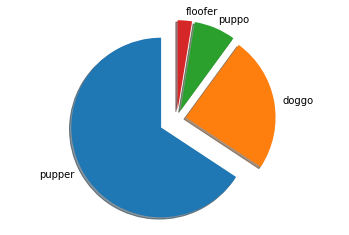

In [59]:
dog_stage_count = list(df_archive_clean[df_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_archive_clean[df_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

#### It seems "lucy", "Cooper" and "Oliver" the highest and most popular dogs names

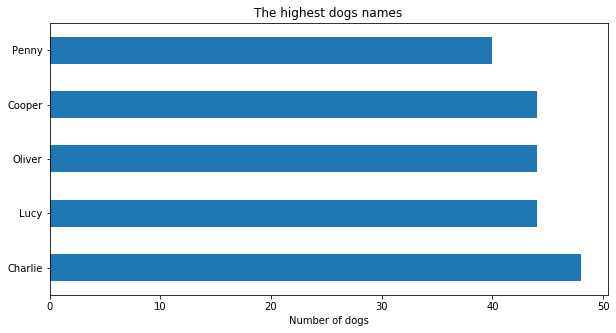

In [60]:
df_archive_clean.name.value_counts()[2:7].plot(kind='barh', figsize=(10,5),
                                               title='The highest dogs names').set_xlabel("Number of dogs");

#### Pupper is the most owned dog, but it has the lowest mean rating

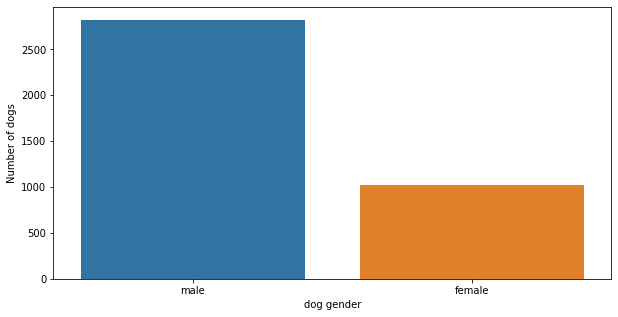

In [61]:
plt.figure(figsize = [10, 5])

graph = sns.countplot(data = df_archive_clean, x = "dog_gender", order = df_archive_clean.dog_gender.value_counts().index);
graph.set_xlabel('dog gender');
graph.set_ylabel('Number of dogs');